In [1]:
#list of useful imports that  I will use
%matplotlib inline
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf

#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
#from keras.optimizers import RMSprop
#from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file = '/content/drive/MyDrive/face_emotion.zip'

In [4]:
import zipfile as zf
data_zip = zf.ZipFile(file)
data_zip.extractall()
!ls

CK+48  drive  sample_data


In [5]:
data = 'CK+48'

In [6]:
#in this we import all the images to the Images.
#in this we append img to images

Images = []
import os
for dirname, _, filenames in os.walk(data):
    for filename in filenames:
        img = os.path.join(dirname, filename)
        Images.append(img)

In [7]:
Images[:10]

['CK+48/surprise/S052_001_00000014.png',
 'CK+48/surprise/S087_001_00000010.png',
 'CK+48/surprise/S063_001_00000011.png',
 'CK+48/surprise/S100_002_00000014.png',
 'CK+48/surprise/S113_001_00000011.png',
 'CK+48/surprise/S053_001_00000022.png',
 'CK+48/surprise/S076_001_00000017.png',
 'CK+48/surprise/S064_001_00000010.png',
 'CK+48/surprise/S111_001_00000014.png',
 'CK+48/surprise/S058_001_00000018.png']

In [8]:
len(Images)

981

In [9]:
#in this we append class label names only
#anger only is append

Class_label = []
for i in Images:
  j = i.split("/")
  #print(j[1])
  Class_label.append(j[1])


In [10]:
Class_label[:10]

['surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise']

In [11]:
len(Class_label)

981

In [12]:
# Shuffle two lists with same order
# Using zip() + * operator + shuffle()
#by using this we combine both by using the zip
#[img1,cat],[img2,dog]by using this we come like this
temp = list(zip(Images, Class_label))
random.shuffle(temp)
Images, Class_label = zip(*temp)

In [13]:
data = pd.DataFrame(list(zip(Images, Class_label)), columns =['Image_path', 'Class_label'])

In [14]:
data.shape

(981, 2)

In [15]:
data.head(10)

,Image_path,Class_label
0,CK+48/sadness/S095_010_00000013.png,sadness
1,CK+48/sadness/S138_007_00000011.png,sadness
2,CK+48/surprise/S035_001_00000015.png,surprise
3,CK+48/fear/S506_004_00000037.png,fear
4,CK+48/disgust/S076_005_00000010.png,disgust
5,CK+48/disgust/S054_004_00000022.png,disgust
6,CK+48/happy/S066_003_00000011.png,happy
7,CK+48/fear/S999_003_00000055.png,fear
8,CK+48/surprise/S032_001_00000020.png,surprise
9,CK+48/anger/S028_001_00000024.png,anger


In [16]:
data.Class_label.value_counts()

,count
Class_label,
surprise,249
happy,207
disgust,177
anger,135
sadness,84
fear,75
contempt,54


In [17]:
from sklearn.utils import resample
#seperate majority and minority classses
df_c0=data[data["Class_label"]=="surprise"]
df_c1=data[data["Class_label"]=="happy"]
df_c3=data[data["Class_label"]=="anger"]
df_c4=data[data["Class_label"]=="sadness"]
df_c5=data[data["Class_label"]=="fear"]       #we take top 3 as majority class and remove the one least one from them

#top 3 majority class has 249,207,177,we remove 177
#top 4 minority class has 135,84,75,54 we remove 54


#upsample majority class
df_c0_upsampled=resample(df_c0,replace=True,n_samples=500,random_state=123)#we convert samples into the 500 each one
df_c1_upsampled=resample(df_c1,replace=True,n_samples=500,random_state=123)
df_c3_upsampled=resample(df_c3,replace=True,n_samples=500,random_state=123)
df_c4_upsampled=resample(df_c4,replace=True,n_samples=500,random_state=123)
df_c5_upsampled=resample(df_c5,replace=True,n_samples=500,random_state=123)


#combine minority class with downsampled majority class
df_upsampled=pd.concat([df_c0_upsampled,df_c1_upsampled,df_c3_upsampled,df_c4_upsampled,df_c5_upsampled])

#Display new class counts

df_upsampled["Class_label"].value_counts()

,count
Class_label,
surprise,500
happy,500
anger,500
sadness,500
fear,500


<ipython-input-18-0166c3922a28>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Class_label",data=df_upsampled,palette=sns.color_palette("cubehelix",4))
<ipython-input-18-0166c3922a28>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(x="Class_label",data=df_upsampled,palette=sns.color_palette("cubehelix",4))


Text(0.5, 0, 'Class_label')

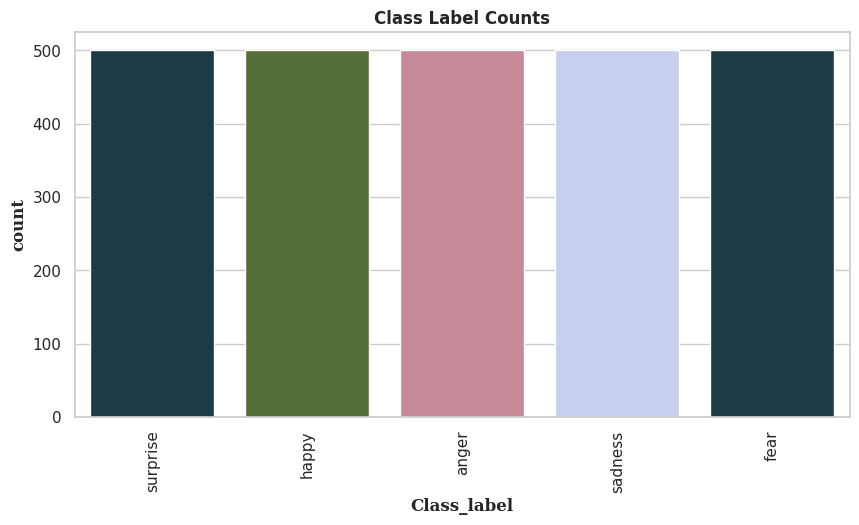

In [18]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax=sns.countplot(x="Class_label",data=df_upsampled,palette=sns.color_palette("cubehelix",4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [19]:
#shuffle the data or mixed the data frac=1 is used for that
data=df_upsampled.sample(frac=1)

In [20]:
data.head()


,Image_path,Class_label
916,CK+48/anger/S042_004_00000019.png,anger
655,CK+48/surprise/S011_001_00000014.png,surprise
846,CK+48/anger/S133_003_00000045.png,anger
367,CK+48/sadness/S064_004_00000012.png,sadness
339,CK+48/surprise/S117_001_00000012.png,surprise


# **RESIZE THE IMAGE**

In [21]:
def resize_images(img):
  #file=image.open(img)
  file=cv2.imread(img)
  #img=file.convert("RGB")
  #img_bgr=img.resize((48,48))
  resized=cv2.resize(file,(48,48),interpolation=cv2.INTER_AREA)#here by using this we convert all images in to 48,48 size only
  img_bgr=np.array(resized)
  return img_bgr

In [22]:
from PIL import Image

In [23]:
images=[resize_images(img)for img in data["Image_path"]]

In [24]:
len(images)


2500

array([[[ 57,  57,  57],
        [ 69,  69,  69],
        [ 64,  64,  64],
        ...,
        [ 97,  97,  97],
        [111, 111, 111],
        [105, 105, 105]],

       [[ 60,  60,  60],
        [ 69,  69,  69],
        [ 62,  62,  62],
        ...,
        [ 94,  94,  94],
        [110, 110, 110],
        [106, 106, 106]],

       [[ 62,  62,  62],
        [ 66,  66,  66],
        [ 62,  62,  62],
        ...,
        [ 88,  88,  88],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       ...,

       [[201, 201, 201],
        [177, 177, 177],
        [162, 162, 162],
        ...,
        [154, 154, 154],
        [154, 154, 154],
        [154, 154, 154]],

       [[200, 200, 200],
        [190, 190, 190],
        [178, 178, 178],
        ...,
        [151, 151, 151],
        [152, 152, 152],
        [151, 151, 151]],

       [[199, 199, 199],
        [199, 199, 199],
        [200, 200, 200],
        ...,
        [149, 149, 149],
        [151, 151, 151],
        [152, 152, 152]]], dtype=uint8)
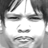

In [25]:
images[0]


In [26]:
#print number of classes in our dataset
num_classes=len(np.unique(data["Class_label"]))


In [27]:
num_classes

5

In [28]:
#save the class into class_names
class_names=list(data["Class_label"])


array([[[ 57,  57,  57],
        [ 69,  69,  69],
        [ 64,  64,  64],
        ...,
        [ 97,  97,  97],
        [111, 111, 111],
        [105, 105, 105]],

       [[ 60,  60,  60],
        [ 69,  69,  69],
        [ 62,  62,  62],
        ...,
        [ 94,  94,  94],
        [110, 110, 110],
        [106, 106, 106]],

       [[ 62,  62,  62],
        [ 66,  66,  66],
        [ 62,  62,  62],
        ...,
        [ 88,  88,  88],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       ...,

       [[201, 201, 201],
        [177, 177, 177],
        [162, 162, 162],
        ...,
        [154, 154, 154],
        [154, 154, 154],
        [154, 154, 154]],

       [[200, 200, 200],
        [190, 190, 190],
        [178, 178, 178],
        ...,
        [151, 151, 151],
        [152, 152, 152],
        [151, 151, 151]],

       [[199, 199, 199],
        [199, 199, 199],
        [200, 200, 200],
        ...,
        [149, 149, 149],
        [151, 151, 151],
        [152, 152, 152]]], dtype=uint8)
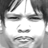

In [29]:
images[0]

Text(0.5, 1.0, 'fear')

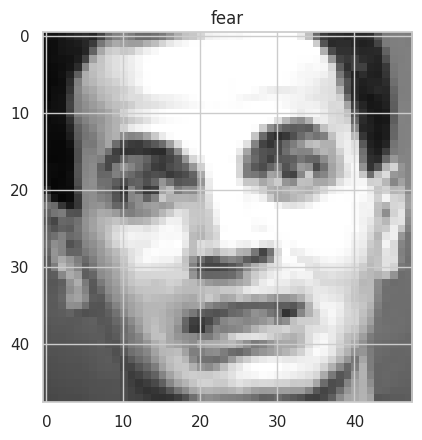

In [30]:
#see the image with class label
plt.imshow(images[5])
plt.title(class_names[5])


Text(0.5, 1.0, 'fear')

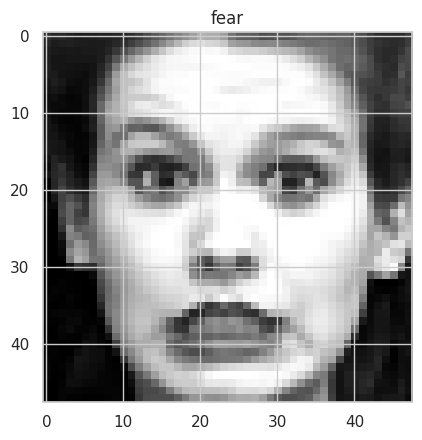

In [31]:
#See the image with class label
plt.imshow(images[10])
plt.title(class_names[10])

Text(0.5, 1.0, 'sadness')

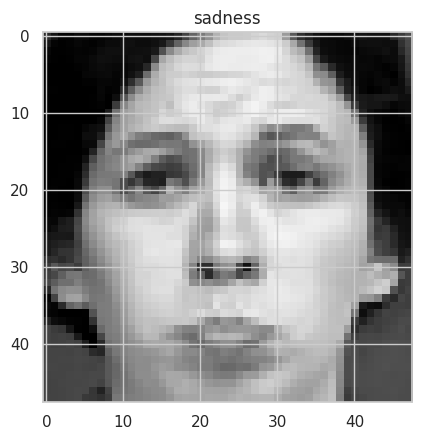

In [32]:
#See the image with class label
plt.imshow(images[400])
plt.title(class_names[400])

Text(0.5, 1.0, 'anger')

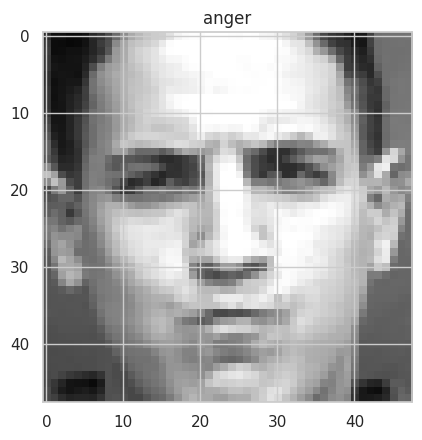

In [33]:
#See the image with class label
plt.imshow(images[70])
plt.title(class_names[70])

# **LABEL ENCODER**

In [34]:
from sklearn.preprocessing import LabelBinarizer
enc=LabelBinarizer()
y=enc.fit_transform(data["Class_label"])
#by using this we convert to label encoder

In [35]:
data["Class_label"][:10]

,Class_label
916,anger
655,surprise
846,anger
367,sadness
339,surprise
835,fear
244,fear
677,fear
359,sadness
588,fear


In [36]:
images=np.array(images)#CONVERT INTO THE ARRAY

In [37]:
images.shape

(2500, 48, 48, 3)

In [38]:
y.shape

(2500, 5)

In [39]:
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

# **SPLITING DATA INTO TRAINING AND TESTING**

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,y,test_size=0.3,stratify=y,random_state=42)

In [41]:
x_train.shape

(1750, 48, 48, 3)

In [42]:
x_test.shape

(750, 48, 48, 3)

# **cnn  model**

In [43]:
#set the Cnn model
batch_size=None
model=Sequential()

# First Convolutional Layer:
# - Filters: 32 filters are used to detect features like edges, textures, etc.
# - Kernel size: Each filter is 5x5 pixels.
# - Padding: "Same" padding ensures the output size is the same as input size.
# - Activation function: ReLU is used to add non-linearity.
# - Input shape: The images have a size of 48x48 pixels and 3 channels (RGB).


model.add(Conv2D(filters=32,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(48,48,3)))

# Second Convolutional Layer:
# - Another 32 filters with 5x5 kernel size.
# - ReLU activation for non-linearity.
model.add(Conv2D(filters=32,kernel_size=(5,5),padding="Same",activation="relu"))

# Max Pooling Layer:
# - Pool size: (2,2), which reduces the size of the image by taking the maximum value in a 2x2 block.
model.add(MaxPool2D(pool_size=(2,2)))

# Dropout Layer:
# - Dropout of 20% of the neurons to help prevent overfitting.
model.add(Dropout(0.2))
# Third Convolutional Layer:
# - Filters increased to 64 to learn more complex features.
# - 3x3 kernel size, with "Same" padding and ReLU activation.
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))

# Fourth Convolutional Layer:
# - Another 64 filters with the same configuration.
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))

# Max Pooling Layer (with stride):
# - Reduces the image size again, with a stride of 2, reducing the spatial dimensions.
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# Dropout Layer:
# - Dropout of 30% of neurons to prevent overfitting further.
model.add(Dropout(0.3))


# Fifth Convolutional Layer:
# - Filters increased again to 128 to learn even more abstract features.
# - 3x3 kernel size with "Same" padding and ReLU activation.
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))

# Sixth Convolutional Layer:
# - Another 128 filters for further feature extraction.
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))


# Max Pooling Layer (with stride):
# - Another max pooling layer to reduce the spatial size.
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Dropout Layer:
# - Dropout of 40% of neurons for further regularization.
model.add(Dropout(0.4))

# Global Max Pooling Layer:
# - This layer reduces the entire feature map into a single value (max value from the entire feature map).
# - It helps reduce dimensionality and prevent overfitting by selecting the most significant feature.
model.add(GlobalMaxPooling2D())

# Fully Connected (Dense) Layer:
# - 256 neurons, with ReLU activation.
# - This layer interprets the features extracted by previous layers.
model.add(Dense(256,activation="relu"))

# Dropout Layer:
# - Dropout of 50% to avoid overfitting and improve generalization.
model.add(Dropout(0.5))

# Output Layer:
# - This is the final layer, with 5 neurons representing 5 different classes.
# - Softmax activation is used to output probabilities for each of the 5 classes, with the sum of probabilities equal to 1.
model.add(Dense(5,activation="softmax"))


# Display the model summary (number of layers, parameters, etc.)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 339,237 (1.29 MB)

 Trainable params: 339,237 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
# Optimizer: Adam (adaptive optimization algorithm), # Loss Function: Categorical Crossentropy (for multi-class classification), # Metrics: Accuracy (percentage of correct predictions)


In [45]:
import warnings
warnings.filterwarnings("ignore")#it remove the warnings

In [46]:
#fit the model
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),batch_size=128) #here we take the epochs

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.1968 - loss: 14.0503 - val_accuracy: 0.2000 - val_loss: 1.6087
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.1929 - loss: 1.6173 - val_accuracy: 0.2053 - val_loss: 1.6070
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.2102 - loss: 1.6098 - val_accuracy: 0.2520 - val_loss: 1.6054
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.2055 - loss: 1.6066 - val_accuracy: 0.2880 - val_loss: 1.6025
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.2526 - loss: 1.5987 - val_accuracy: 0.2240 - val_loss: 1.5871
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.2494 - loss: 1.5862 - val_accuracy: 0.3493 - val_loss: 1.5649
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.2909 - loss: 1.5707 - val_accuracy: 0.3133 - val_loss: 1.5671
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.2993 - loss: 1.5561 - val_accuracy: 0.3573 - val_loss

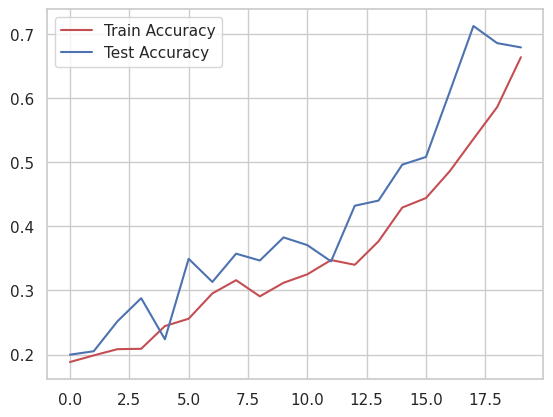

In [47]:
#plot the accuracy plot
plt.plot(history.history["accuracy"], "r")
plt.plot(history.history["val_accuracy"],"b")
plt.legend({"Train Accuracy":"r","Test Accuracy":"b"})
plt.show()

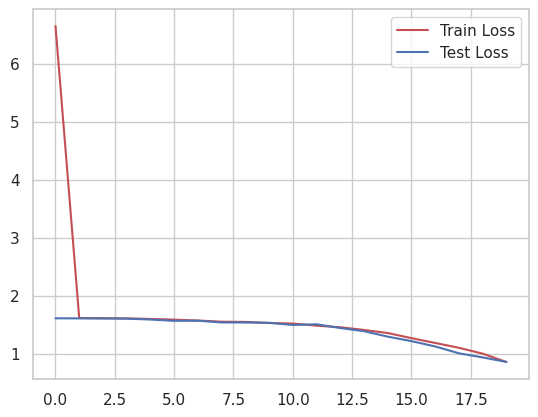

In [48]:
#plot the accuracy plot
plt.plot(history.history["loss"],"r")
plt.plot(history.history["val_loss"],"b")
plt.legend({"Train Loss":"r","Test Loss":"b"})
plt.show()

In [49]:
#print the test accuracy
score_1=model.evaluate(x_test,y_test,verbose=0)
print("Test accuracy:",score_1[1])

Test accuracy: 0.6786666512489319


In [50]:
results=pd.DataFrame(columns=["Model","Test Accuracy"])


In [51]:
new=["CNN",score_1[1]]
results.loc[1]=new

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step


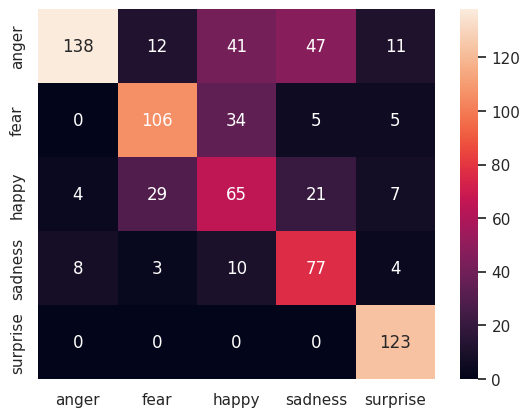

In [52]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names=enc.classes_
df_heatmap=pd.DataFrame(confusion_matrix(np.argmax(model.predict(x_test),axis=1),np.argmax(y_test,axis=1)),columns=class_names,index=class_names)
heatmap=sns.heatmap(df_heatmap,annot=True,fmt="d")

In [53]:
df_heatmap

,anger,fear,happy,sadness,surprise
anger,138,12,41,47,11
fear,0,106,34,5,5
happy,4,29,65,21,7
sadness,8,3,10,77,4
surprise,0,0,0,0,123


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


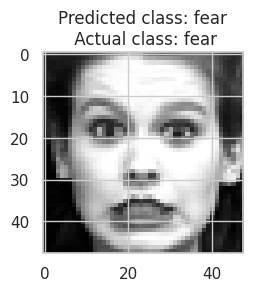

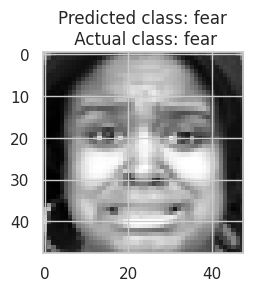

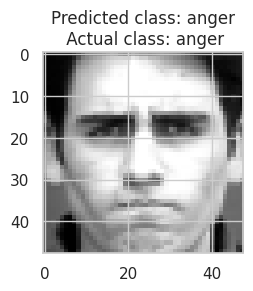

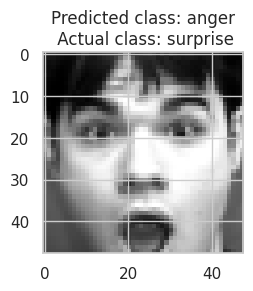

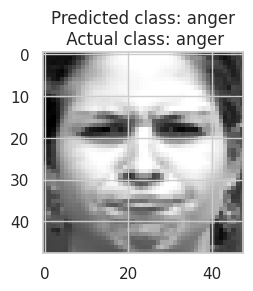

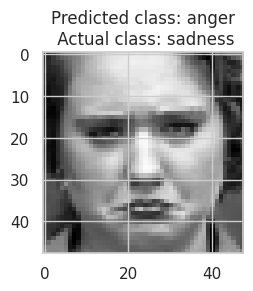

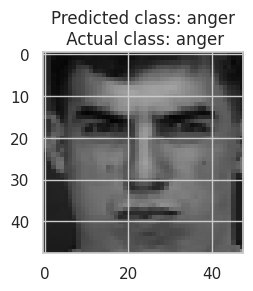

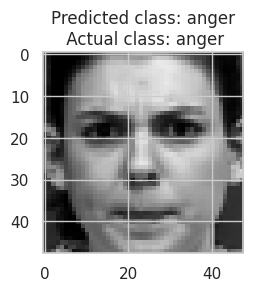

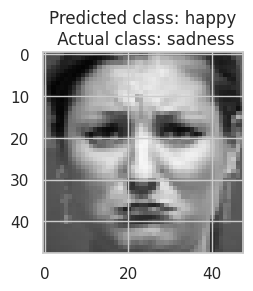

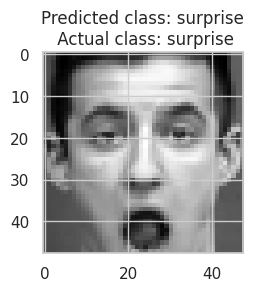

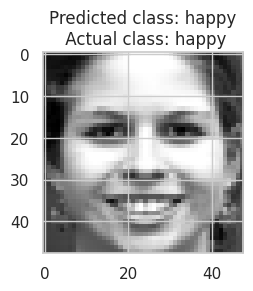

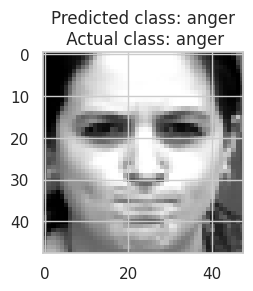

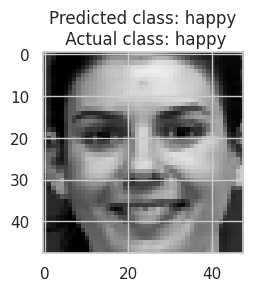

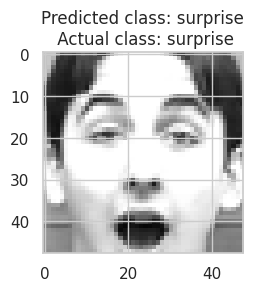

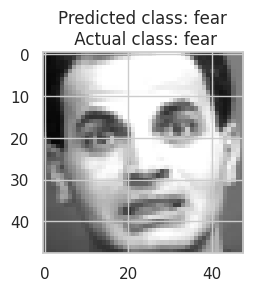

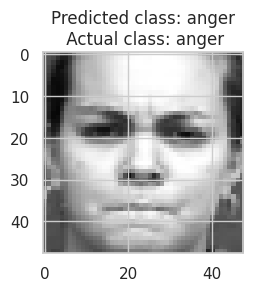

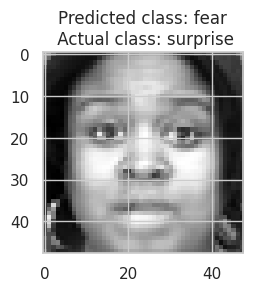

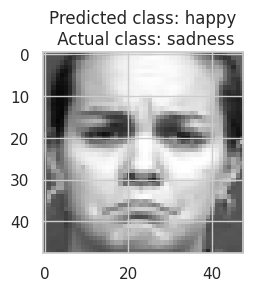

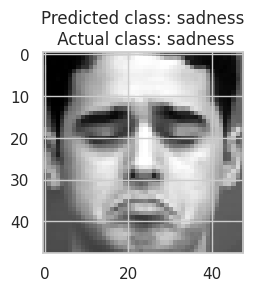

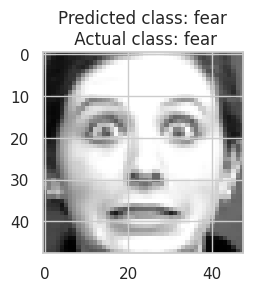

In [54]:
#print images with actual and predicted class labels
# print images with actiual abnd predicted class labels
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = model.predict(np.array([x_test[i]]))[0]
  pred = np.argmax(pred)
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(x_test[i])

# **VGG_16 MODEL**

In [55]:
from keras.applications.vgg16 import VGG16
vgg=VGG16(weights="imagenet",include_top=False,input_shape=(48,48,3))
vgg.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [56]:
#set the vgg16 model
model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128,activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(5,activation="softmax"))

In [57]:
#compile the model
model_1.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [58]:
History_1=model_1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.2709 - loss: 12.3829 - val_accuracy: 0.5827 - val_loss: 2.4907
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 102s 7s/step - accuracy: 0.5401 - loss: 4.3843 - val_accuracy: 0.7747 - val_loss: 1.0770
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.6514 - loss: 2.6685 - val_accuracy: 0.8627 - val_loss: 0.5128
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - accuracy: 0.7521 - loss: 1.4521 - val_accuracy: 0.9200 - val_loss: 0.3091
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.7990 - loss: 1.0064 - val_accuracy: 0.9307 - val_loss: 0.2523
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.8598 - loss: 0.6162 - val_accuracy: 0.9533 - val_loss: 0.1580
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.8564 - loss: 0.5424 - val_accuracy: 0.9560 - val_loss: 0.1321
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.8908 - loss: 0.4422 - val_accuracy: 0.9613 - va

In [59]:
# print the test accuracy
score_2 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.9800000190734863


In [60]:
new = ['VGG-16 ',score_2[1]]
results.loc[2] = new

24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 913ms/step


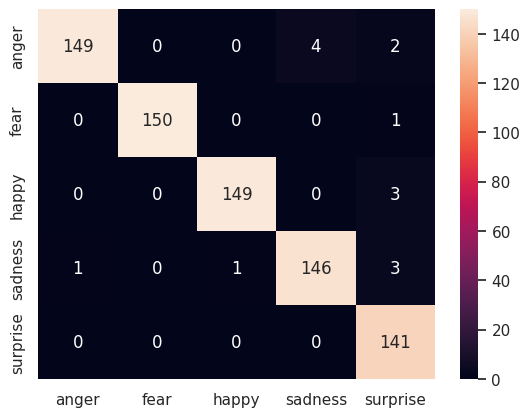

In [61]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model_1.predict(x_test),axis = 1),np.argmax(y_test,axis=1)),columns=class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

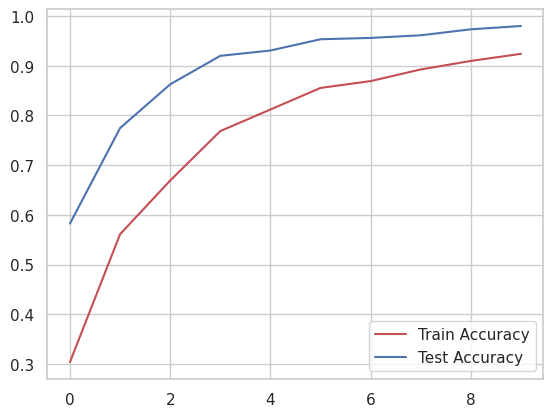

In [62]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

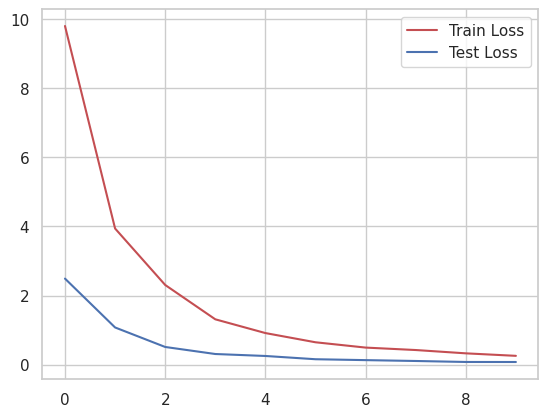

In [63]:
# plot the accuracy plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


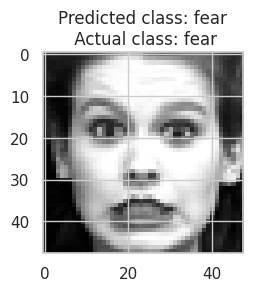

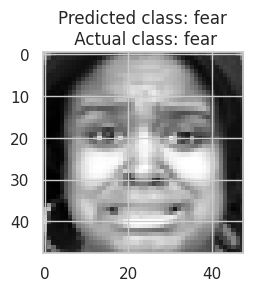

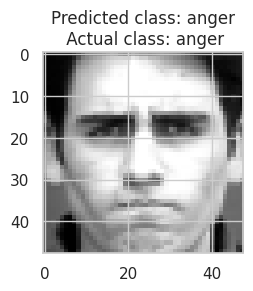

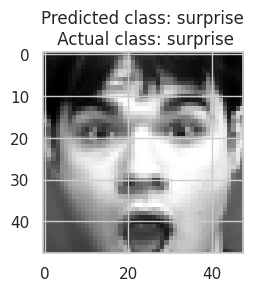

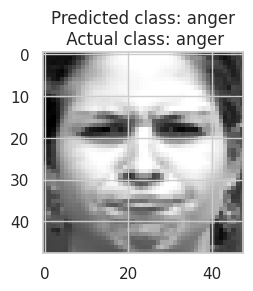

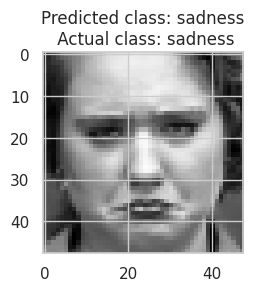

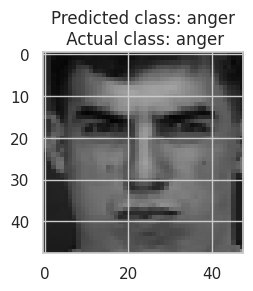

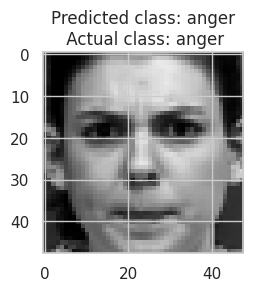

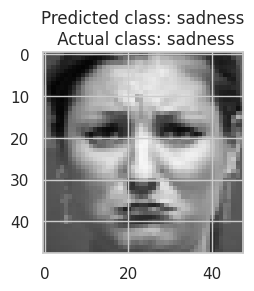

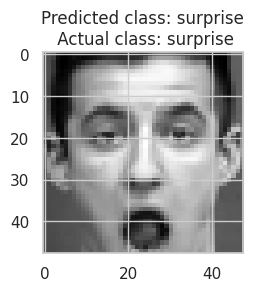

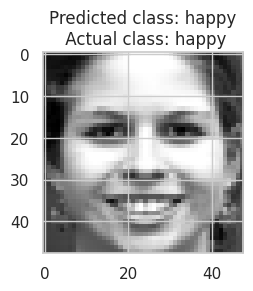

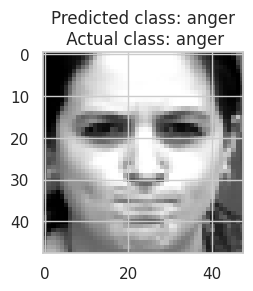

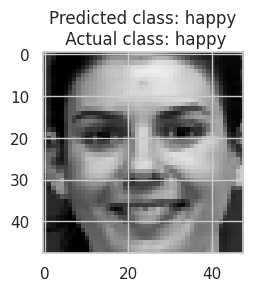

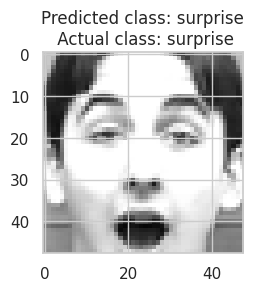

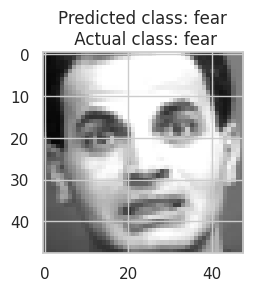

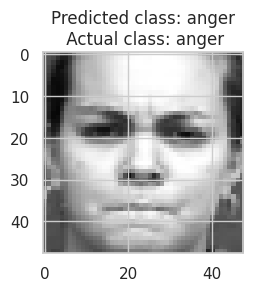

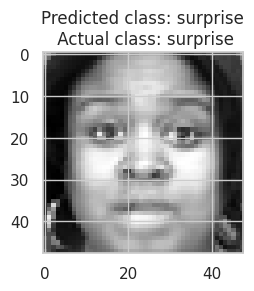

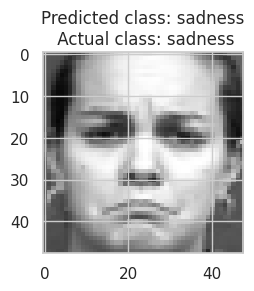

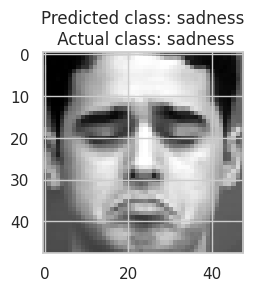

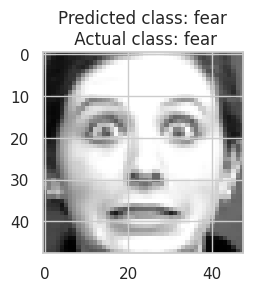

In [64]:
# print images with actiual abnd predicted class labels
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = model_1.predict(np.array([x_test[i]]))[0]
  pred = np.argmax(pred)
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(x_test[i])

## ***VGG_19 MODEL***

In [65]:
# import the vgg16 model
from keras.applications.vgg19 import VGG19


In [66]:
vgg=VGG19(weights='imagenet',include_top=False,input_shape=(48,48,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [68]:
#Fit the data or train the model
History_1 = model_1.fit(x_train, y_train, epochs = 20, validation_data = (x_test,y_test),batch_size = 128)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.9288 - loss: 0.2403 - val_accuracy: 0.9733 - val_loss: 0.0687
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 0.9420 - loss: 0.1692 - val_accuracy: 0.9853 - val_loss: 0.0604
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.9438 - loss: 0.1570 - val_accuracy: 0.9853 - val_loss: 0.0527
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9466 - loss: 0.1366 - val_accuracy: 0.9867 - val_loss: 0.0396
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.9617 - loss: 0.1117 - val_accuracy: 0.9907 - val_loss: 0.0361
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 100s 7s/step - accuracy: 0.9672 - loss: 0.0963 - val_accuracy: 0.9920 - val_loss: 0.0306
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.9752 - loss: 0.0713 - val_accuracy: 0.9880 - val_loss: 0.0378
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 104s 7s/step - accuracy: 0.9761 - loss: 0.0640 - val_accuracy: 0.9920 - val_lo

In [69]:
# print the test accuracy
score_2 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.9933333396911621


In [70]:
new = ['VGG-19 ',score_2[1]]
results.loc[3] = new

24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 892ms/step


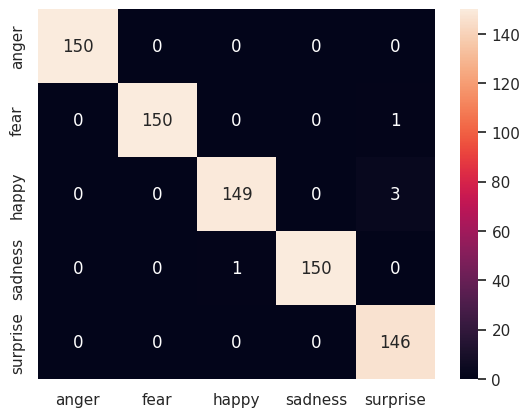

In [71]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model_1.predict(x_test),axis = 1),np.argmax(y_test,axis=1)),columns=class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

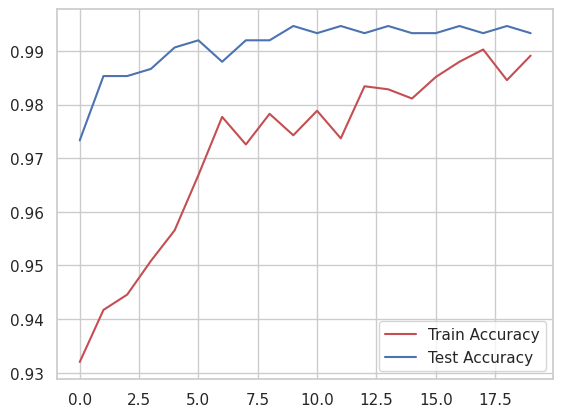

In [72]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

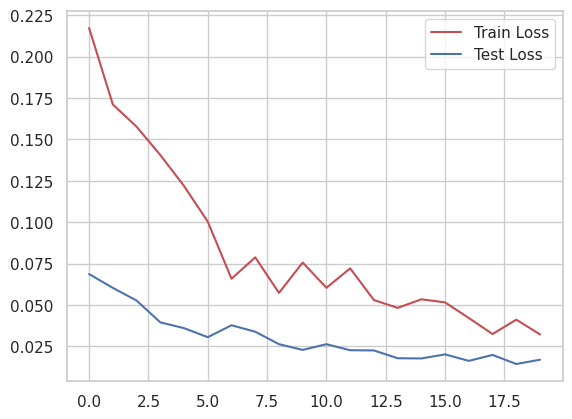

In [73]:
# plot the accuracy plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


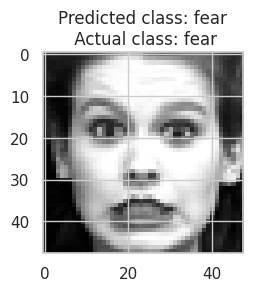

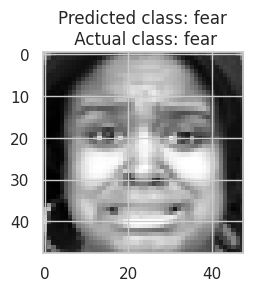

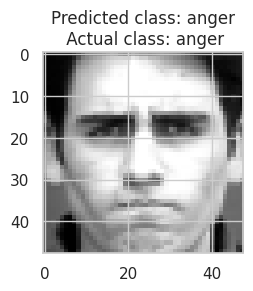

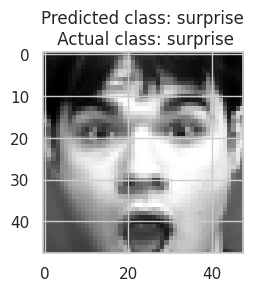

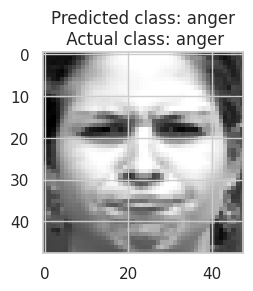

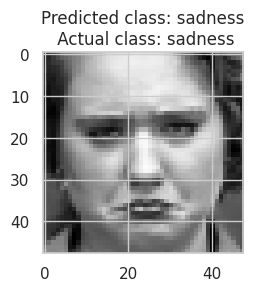

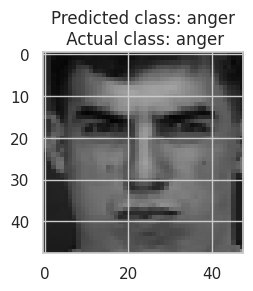

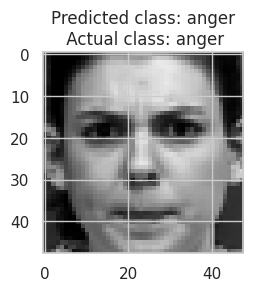

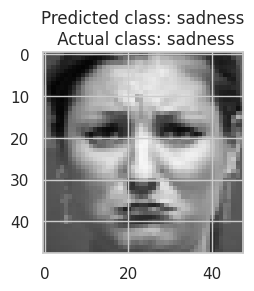

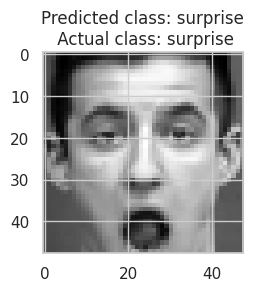

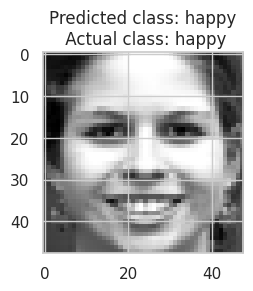

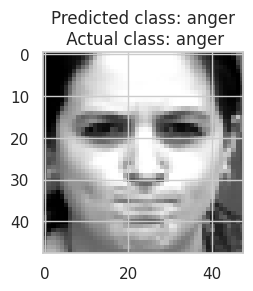

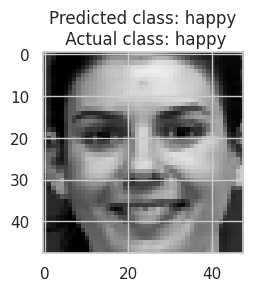

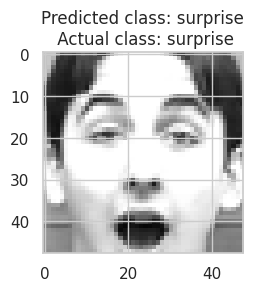

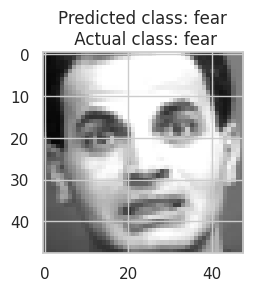

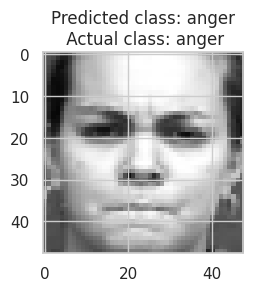

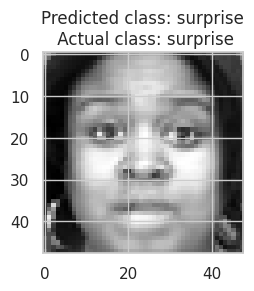

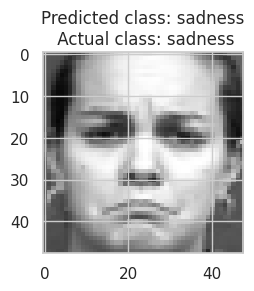

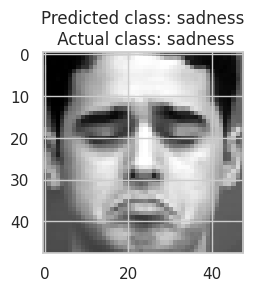

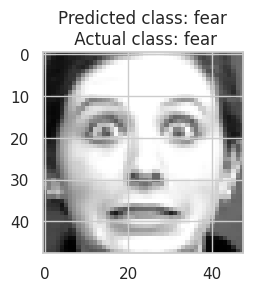

In [74]:
# print images with actiual abnd predicted class labels
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = model_1.predict(np.array([x_test[i]]))[0]
  pred = np.argmax(pred)
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(x_test[i])

# **MOBILE NET**

In [75]:
# import the vgg16 model
from keras.applications.mobilenet import MobileNet
#from tf.keras.applications.mobilenet.MobileNet

In [76]:
mob=MobileNet(weights='imagenet',include_top=False,input_shape=(48,48,3))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [77]:
mob.trainable=False

In [78]:
# Set the vgg16 model

model_1=Sequential()
model_1.add(mob)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(5, activation='softmax'))

In [79]:
#Compile the model
model_1.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

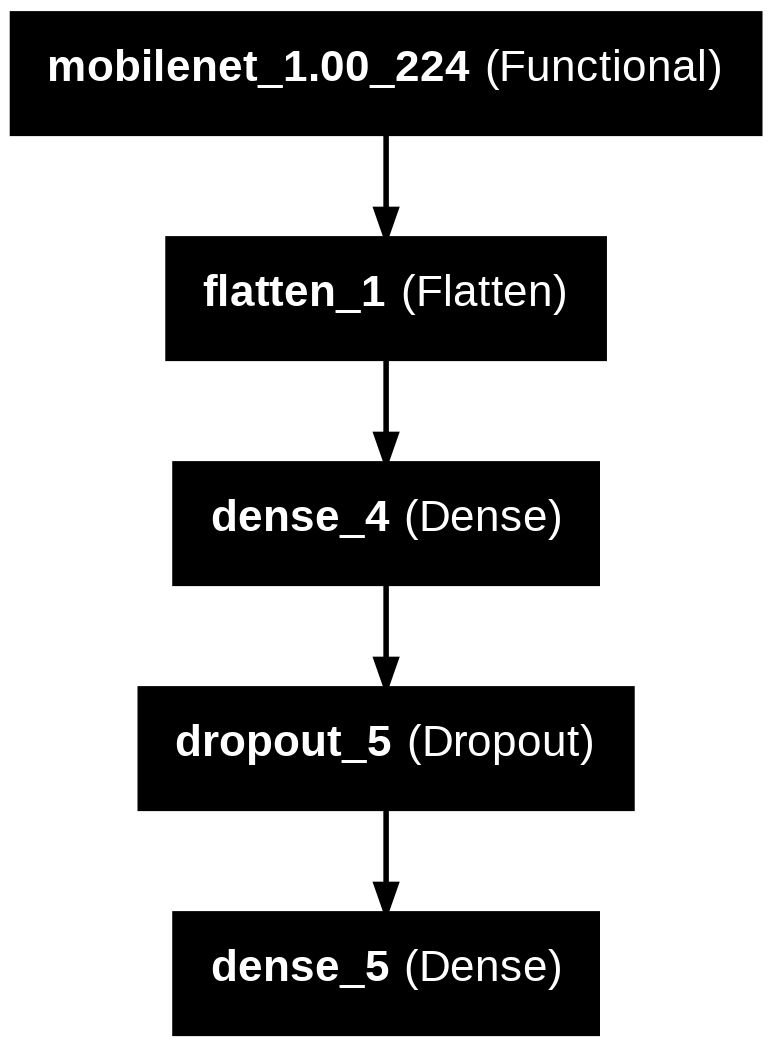

In [82]:
from tensorflow.keras.utils import plot_model # Import plot_model from the correct location
plot_model(model_1, to_file='model_plot.png', show_shapes=False, show_layer_names=True)

In [83]:
#Fit the data or train the model
History_1 = model_1.fit(x_train, y_train, epochs = 20, validation_data = (x_test,y_test),batch_size = 128)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 435ms/step - accuracy: 0.2153 - loss: 1.6803 - val_accuracy: 0.2640 - val_loss: 1.6018
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.2557 - loss: 1.5984 - val_accuracy: 0.3187 - val_loss: 1.5813
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 380ms/step - accuracy: 0.2890 - loss: 1.5663 - val_accuracy: 0.2880 - val_loss: 1.5588
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 287ms/step - accuracy: 0.3189 - loss: 1.5534 - val_accuracy: 0.3200 - val_loss: 1.5422
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 385ms/step - accuracy: 0.3195 - loss: 1.5353 - val_accuracy: 0.3200 - val_loss: 1.5292
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.3086 - loss: 1.5315 - val_accuracy: 0.3520 - val_loss: 1.5167
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 436ms/step - accuracy: 0.3368 - loss: 1.5049 - val_accuracy: 0.3613 - val_loss: 1.5056
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step - accuracy: 0.3512 - loss: 1.4893 - val_accuracy: 0

In [84]:
# print the test accuracy
score_2 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])


Test accuracy: 0.42533332109451294


In [85]:
new = ['Mobile Net ',score_2[1]]
results.loc[4] = new

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step


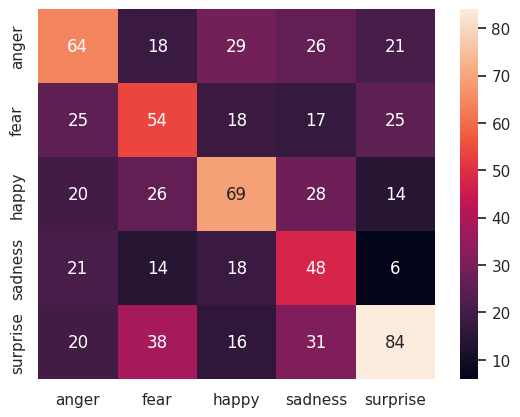

In [86]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model_1.predict(x_test),axis = 1),np.argmax(y_test,axis=1)),columns=class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

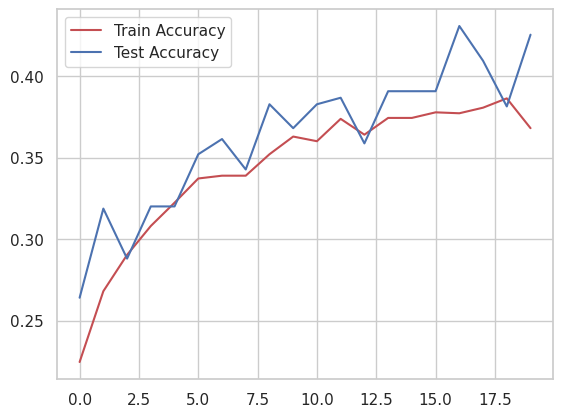

In [87]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

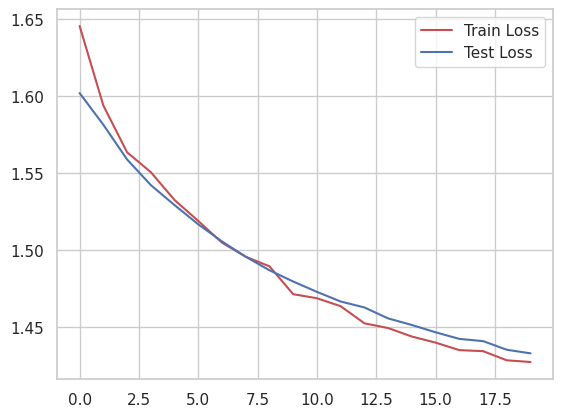

In [88]:
# plot the accuracy plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


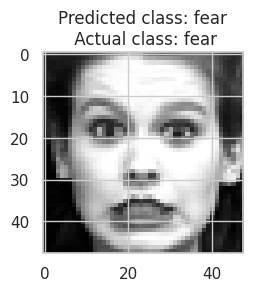

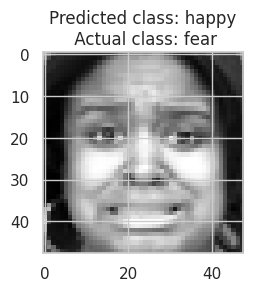

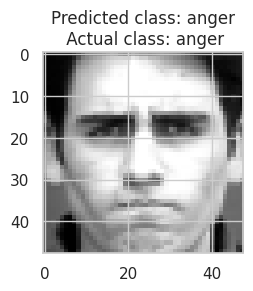

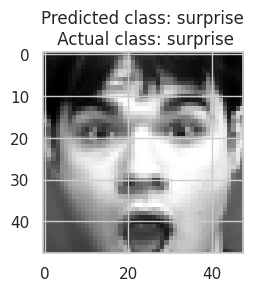

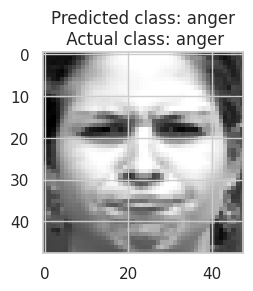

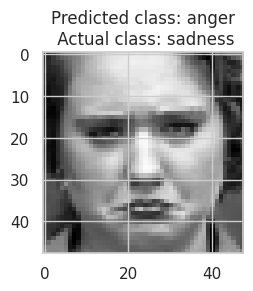

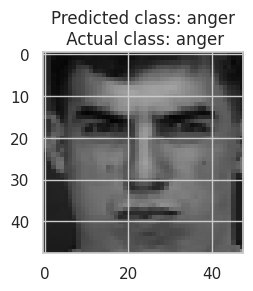

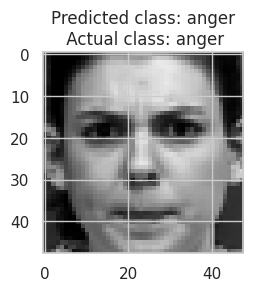

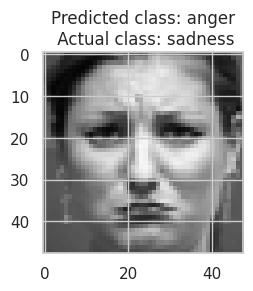

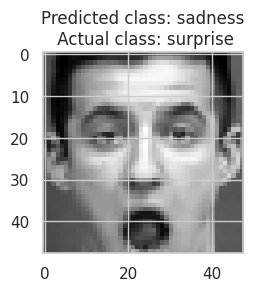

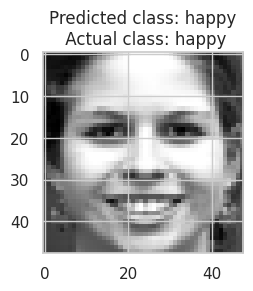

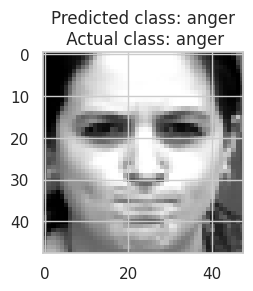

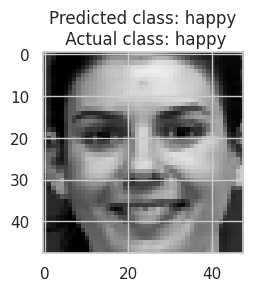

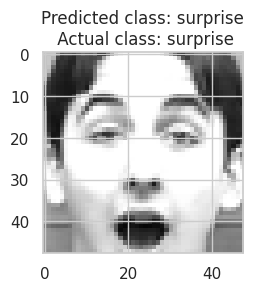

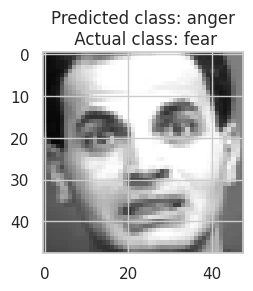

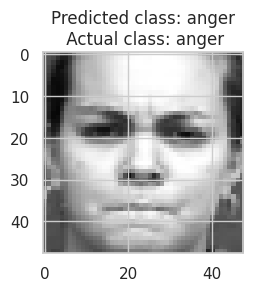

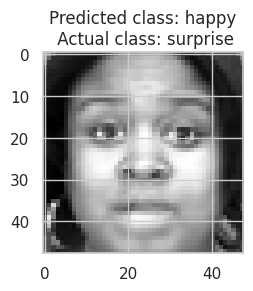

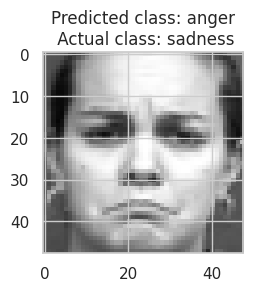

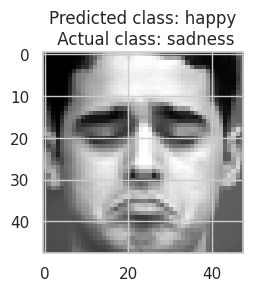

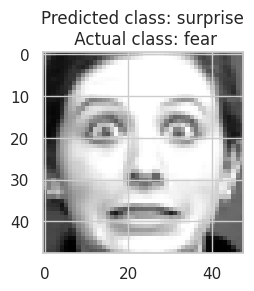

In [89]:
# print images with actiual abnd predicted class labels
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = model_1.predict(np.array([x_test[i]]))[0]
  pred = np.argmax(pred)
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(x_test[i])

# *PERFORMANCE TABLE*

In [90]:
results

,Model,Test Accuracy
1,CNN,0.678667
2,VGG-16,0.980000
3,VGG-19,0.993333
4,Mobile Net,0.425333
